In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Normalized Data Read & Understand Again Before Model Input

In [3]:
df = pd.read_csv('dataset/Mahananda_River_Water_at_Siliguri_Normalized_Data.csv', encoding = 'ISO-8859-1')

In [4]:
df.isnull().sum()

Unnamed: 0                     0
COD                            0
Conductivity                   0
Dissolved O2(DO)               0
pH                             0
Potassium                      0
Sulphate                       0
Temperature                    0
Total Coliform                 0
Total Dissolved Solids(TDS)    0
Total Hardness as CaCo3        0
Turbidity                      0
dtype: int64

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [268]:
df

,COD,Conductivity,Dissolved O2(DO),pH,Potassium,Sulphate,Temperature,Total Coliform,Total Dissolved Solids(TDS),Total Hardness as CaCo3,Turbidity
0,20.340078,179.32,7.0,7.19,4.279921,13.360183,14.0,8000.0,138.402344,58.555469,69.779286
1,32.000000,179.32,7.3,7.21,4.000000,11.100000,26.0,8000.0,112.000000,52.500000,27.100000
2,20.340078,179.32,7.3,7.10,4.279921,13.360183,29.0,11000.0,138.402344,58.555469,69.779286
3,20.340078,179.32,7.3,6.97,4.279921,13.360183,30.0,14000.0,138.402344,58.555469,69.779286
4,20.340078,179.32,7.4,6.95,4.279921,13.360183,20.0,14000.0,138.402344,58.555469,69.779286
...,...,...,...,...,...,...,...,...,...,...,...
129,9.800000,179.32,7.5,7.10,3.010000,11.200000,28.0,38000.0,144.000000,31.000000,5.900000
130,8.000000,179.32,6.8,7.06,3.000000,8.990000,23.0,24000.0,150.000000,45.000000,6.620000
131,10.000000,179.32,7.1,7.01,4.000000,9.450000,28.0,28000.0,126.000000,58.000000,21.000000
132,5.200000,179.32,6.9,6.91,2.300000,10.200000,22.0,36000.0,111.000000,50.000000,9.610000


In [7]:
df.columns

Index(['COD', 'Conductivity', 'Dissolved O2(DO)', 'pH', 'Potassium',
       'Sulphate', 'Temperature', 'Total Coliform',
       'Total Dissolved Solids(TDS)', 'Total Hardness as CaCo3', 'Turbidity'],
      dtype='object')

### Making Relationship with Other Parameters to DO using Scatter Plot

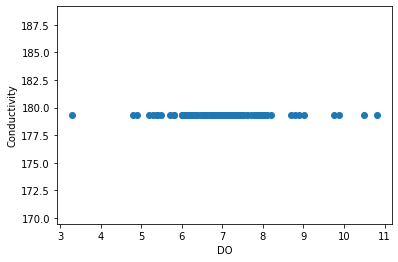

In [309]:
y_axis = df['Conductivity']
x_axis = df['Dissolved O2(DO)']
plt.ylabel('Conductivity')
plt.xlabel('DO')
plt.scatter(x_axis,y_axis)
plt.show()

#### Conclude: Conductivity is Constant lying apprx 178-180 wrt DO increasing

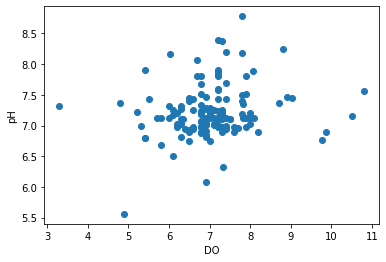

In [310]:
y_axis = df['pH']
x_axis = df['Dissolved O2(DO)']
plt.ylabel('pH')
plt.xlabel('DO')
plt.scatter(x_axis,y_axis)
plt.show()

#### Conclude: pH is lying mostly in between 6.5-8.0 when DO is in 5.5-8.5

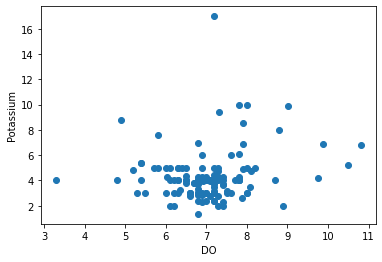

In [311]:
y_axis = df['Potassium']
x_axis = df['Dissolved O2(DO)']
plt.ylabel('Potassium')
plt.xlabel('DO')
plt.scatter(x_axis,y_axis)
plt.show()

#### Conclude: Potassium is mostly lying in between 1.5-8.0 when DO in 5.0-9.0

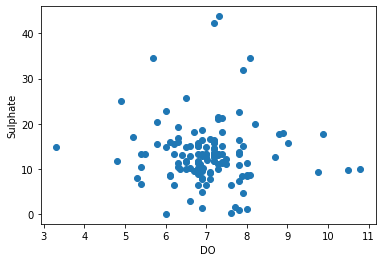

In [312]:
y_axis = df['Sulphate']
x_axis = df['Dissolved O2(DO)']
plt.ylabel('Sulphate')
plt.xlabel('DO')
plt.scatter(x_axis,y_axis)
plt.show()

#### Conclude: Sulphate is mostly lying in between 0-25.0 when DO is in 5.0-9.0

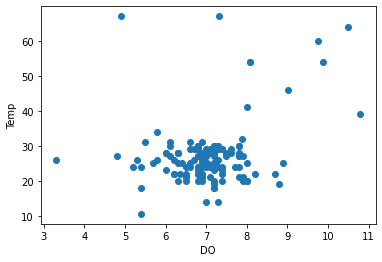

In [313]:
y_axis = df['Temperature']
x_axis = df['Dissolved O2(DO)']
plt.ylabel('Temp')
plt.xlabel('DO')
plt.scatter(x_axis,y_axis)
plt.show()

#### Conclude: Temp is mostly lying in between 10-35.0 when DO is in 5.0-9.0

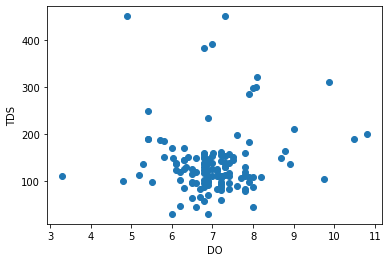

In [314]:
y_axis = df['Total Dissolved Solids(TDS)']
x_axis = df['Dissolved O2(DO)']
plt.ylabel('TDS')
plt.xlabel('DO')
plt.scatter(x_axis,y_axis)
plt.show()

#### Conclude: TDS is mostly lying in between 0-200.0 when DO is in 5.0-9.0

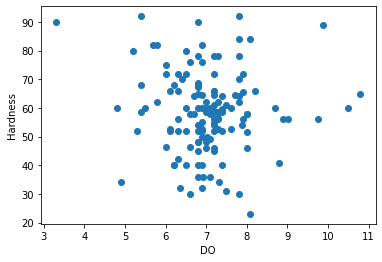

In [315]:
y_axis = df['Total Hardness as CaCo3']
x_axis = df['Dissolved O2(DO)']
plt.ylabel('Hardness')
plt.xlabel('DO')
plt.scatter(x_axis,y_axis)
plt.show()

#### Conclude: Hardness is mostly lying in between 30-90 when DO is in 5.0-9.0

#### Removing Total Coliform , COD, Turbidity because of its Discrete Behavior of Spreadness and After Normalize They don't react because of that reason :  Taking Independent Features as : Conductivity , pH, Potassium, Sulphate, Temp, TDS , Hardness and Dependent Feature is DO

In [143]:
x = df.drop(columns=['Dissolved O2(DO)','Total Coliform','COD','Turbidity'], axis=1)

In [144]:
x

,Conductivity,pH,Potassium,Sulphate,Temperature,Total Dissolved Solids(TDS),Total Hardness as CaCo3
0,179.32,7.19,4.279921,13.360183,14.0,138.402344,58.555469
1,179.32,7.21,4.000000,11.100000,26.0,112.000000,52.500000
2,179.32,7.10,4.279921,13.360183,29.0,138.402344,58.555469
3,179.32,6.97,4.279921,13.360183,30.0,138.402344,58.555469
4,179.32,6.95,4.279921,13.360183,20.0,138.402344,58.555469
...,...,...,...,...,...,...,...
129,179.32,7.10,3.010000,11.200000,28.0,144.000000,31.000000
130,179.32,7.06,3.000000,8.990000,23.0,150.000000,45.000000
131,179.32,7.01,4.000000,9.450000,28.0,126.000000,58.000000
132,179.32,6.91,2.300000,10.200000,22.0,111.000000,50.000000


#### Checking Normalization Again through Histogram before Model Feeding

array([[<AxesSubplot:title={'center':'Conductivity'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Potassium'}>],
       [<AxesSubplot:title={'center':'Sulphate'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Total Dissolved Solids(TDS)'}>],
       [<AxesSubplot:title={'center':'Total Hardness as CaCo3'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

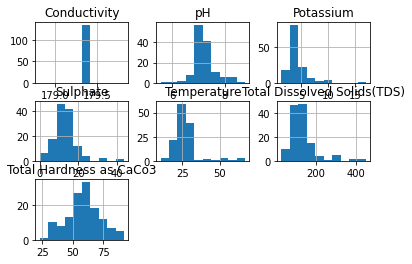

In [145]:
x.hist()

#### Conclude:  All taking as X(independent Features) are quite Normalized and also dependent Feature(Y)

In [146]:
y = df['Dissolved O2(DO)']

In [147]:
y


0      7.0
1      7.3
2      7.3
3      7.3
4      7.4
      ... 
129    7.5
130    6.8
131    7.1
132    6.9
133    6.2
Name: Dissolved O2(DO), Length: 134, dtype: float64

### Transform X and Y to be in same range , that's why Model can properly recongnize and classify them , NOT like a big value interms of a shorter one can neglify another. So Using Min Max Scaling Normalization we done that

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [149]:
X_scaled

array([[0.        , 0.50621118, 0.18721542, 0.30403767, 0.06161473,
        0.25810082, 0.51529665],
       [0.        , 0.51242236, 0.16932907, 0.2523279 , 0.27407932,
        0.1952381 , 0.42753623],
       [0.        , 0.47826087, 0.18721542, 0.30403767, 0.32719547,
        0.25810082, 0.51529665],
       [0.        , 0.4378882 , 0.18721542, 0.30403767, 0.34490085,
        0.25810082, 0.51529665],
       [0.        , 0.43167702, 0.18721542, 0.30403767, 0.16784703,
        0.25810082, 0.51529665],
       [0.        , 0.48330435, 0.23322684, 0.02537235, 0.16784703,
        0.18571429, 0.41304348],
       [0.        , 0.48330435, 0.22811502, 0.10796403, 0.2917847 ,
        0.18571429, 0.47826087],
       [0.        , 0.43478261, 0.16932907, 0.03292228, 0.23866856,
        0.18095238, 0.60347826],
       [0.        , 0.48330435, 0.18721542, 0.03063442, 0.18555241,
        0.16666667, 0.60347826],
       [0.        , 0.43167702, 0.10543131, 0.06678258, 0.36260623,
        0.28095238, 0.3

In [150]:
y = y.values.reshape(-1,1)

In [151]:
Y_scaled = scaler.fit_transform(y)

In [152]:
X_scaled

array([[0.        , 0.50621118, 0.18721542, 0.30403767, 0.06161473,
        0.25810082, 0.51529665],
       [0.        , 0.51242236, 0.16932907, 0.2523279 , 0.27407932,
        0.1952381 , 0.42753623],
       [0.        , 0.47826087, 0.18721542, 0.30403767, 0.32719547,
        0.25810082, 0.51529665],
       [0.        , 0.4378882 , 0.18721542, 0.30403767, 0.34490085,
        0.25810082, 0.51529665],
       [0.        , 0.43167702, 0.18721542, 0.30403767, 0.16784703,
        0.25810082, 0.51529665],
       [0.        , 0.48330435, 0.23322684, 0.02537235, 0.16784703,
        0.18571429, 0.41304348],
       [0.        , 0.48330435, 0.22811502, 0.10796403, 0.2917847 ,
        0.18571429, 0.47826087],
       [0.        , 0.43478261, 0.16932907, 0.03292228, 0.23866856,
        0.18095238, 0.60347826],
       [0.        , 0.48330435, 0.18721542, 0.03063442, 0.18555241,
        0.16666667, 0.60347826],
       [0.        , 0.43167702, 0.10543131, 0.06678258, 0.36260623,
        0.28095238, 0.3

In [153]:
Y_scaled

array([[0.49333333],
       [0.53333333],
       [0.53333333],
       [0.53333333],
       [0.54666667],
       [0.62666667],
       [0.61333333],
       [0.58666667],
       [0.48      ],
       [0.44      ],
       [0.36      ],
       [0.57333333],
       [0.37333333],
       [0.49333333],
       [0.48      ],
       [0.60177444],
       [0.6       ],
       [0.49333333],
       [0.41333333],
       [0.46666667],
       [0.4       ],
       [0.36      ],
       [0.49333333],
       [0.46666667],
       [0.44      ],
       [0.44      ],
       [0.45333333],
       [0.61333333],
       [0.73333333],
       [0.61333333],
       [0.53333333],
       [0.6       ],
       [0.54666667],
       [0.52      ],
       [0.46666667],
       [0.53333333],
       [0.52      ],
       [0.54666667],
       [0.46666667],
       [0.52      ],
       [0.62666667],
       [0.52      ],
       [0.54666667],
       [0.52      ],
       [0.52      ],
       [0.6       ],
       [0.46666667],
       [0.52 

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size= 0.20, random_state=5)

In [155]:
X_train.shape

(107, 7)

In [156]:
y_test

array([[0.53333333],
       [0.46666667],
       [0.46666667],
       [0.36      ],
       [0.96      ],
       [0.36      ],
       [0.29333333],
       [0.46666667],
       [0.38666667],
       [0.48      ],
       [0.52      ],
       [0.876     ],
       [0.52      ],
       [0.33333333],
       [0.44      ],
       [0.46666667],
       [0.2       ],
       [0.536     ],
       [0.4       ],
       [0.48      ],
       [0.42666667],
       [0.54666667],
       [0.49333333],
       [0.4       ],
       [0.48      ],
       [0.60173333],
       [0.61333333]])

### Using Tensorflow ANN Deep NN Model

In [157]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import BatchNormalization 
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [257]:
model = Sequential()
model.add(Dense(100, input_dim=7, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(80, activation='relu'))

model.add(Dense(80, activation='relu'))

model.add(Dense(80, activation='relu'))

model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_290 (Dense)           (None, 100)               800       
                                                                 
 dense_291 (Dense)           (None, 100)               10100     
                                                                 
 dense_292 (Dense)           (None, 100)               10100     
                                                                 
 dense_293 (Dense)           (None, 100)               10100     
                                                                 
 dense_294 (Dense)           (None, 100)               10100     
                                                                 
 dense_295 (Dense)           (None, 100)               10100     
                                                                 
 dense_296 (Dense)           (None, 80)              

#### Calculate Model Loss as Mean_Squared_Error / MSE

In [258]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [259]:
epochs_hist = model.fit(X_train, y_train, epochs=400, verbose=1, validation_split=0.2, batch_size=25, callbacks=callback)

Epoch 1/400
4/4 [==============================] - 1s 60ms/step - loss: 0.2429 - val_loss: 0.1719
Epoch 2/400
4/4 [==============================] - 0s 15ms/step - loss: 0.1234 - val_loss: 0.0186
Epoch 3/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0361 - val_loss: 0.0388
Epoch 4/400
4/4 [==============================] - 0s 17ms/step - loss: 0.0230 - val_loss: 0.0203
Epoch 5/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0270 - val_loss: 0.0209
Epoch 6/400
4/4 [==============================] - 0s 13ms/step - loss: 0.0215 - val_loss: 0.0149
Epoch 7/400
4/4 [==============================] - 0s 16ms/step - loss: 0.0183 - val_loss: 0.0169
Epoch 8/400
4/4 [==============================] - 0s 12ms/step - loss: 0.0185 - val_loss: 0.0135
Epoch 9/400
4/4 [==============================] - 0s 15ms/step - loss: 0.0159 - val_loss: 0.0131
Epoch 10/400
4/4 [==============================] - 0s 19ms/step - loss: 0.0152 - val_loss: 0.0128
Epoch 11/400
4/4 [=

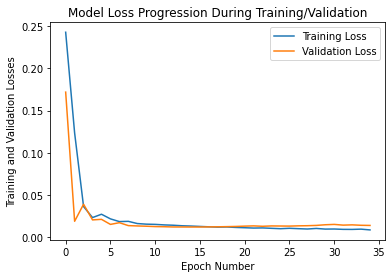

In [260]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

#### Prediction using Test Data

In [261]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

1/1 [==============================] - 0s 19ms/step - loss: 0.0179
0.01790226250886917


### Mean Squared Error in Testing Data is 0.017 or 1.7%

#### Prediction Using Manual Test Data (Arbitary) and You can check the above relationship behavior with other parameters to DO is working properly or not after Model Training & Prediction . It's Working Fine ... So Model is well Trained

In [296]:
X_Testing = np.array([[179.32,6.95,4.279921,13.360183,20.0,138.402344,58.555469]])

In [297]:
y_predict = model.predict(X_Testing)
y_predict.shape

1/1 [==============================] - 0s 37ms/step


(1, 1)

In [298]:
print('Expected DO=', y_predict[:,0])

Expected DO= [7.7844954]
